In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
# Import all the relevant datasets
worldhappinessreport = pd.read_csv('2019.csv')
gdppercapita = pd.read_csv('GDPperCapita.csv')
freedomScore = pd.read_csv('HFI2021.csv')
givingIndex = pd.read_excel('givingindex.xlsx')
lifeexpectancy = pd.read_csv('Human_Development_Index_(2019).csv')
socialsupport = pd.read_csv('socialsupport.csv')
trustingovt = pd.read_csv('trust.csv')

# Removing irrelevant rows and columns so that each dataframe only contains countries and their respective data

In [3]:
# See which columns are relevant for our analysis
gdppercapita.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,1/3/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.00000,1963.000000,1964.000000,1965.000000,...,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.00000,2019.000000,2020.000000,2021.00000
3,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.59452,31650.760540,24487.863560,29342.10086
4,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.00246,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.73434,1512.270553,1363.540741,1549.77273


In [4]:
gdppercapita.columns = gdppercapita.iloc[2] # Set the column headings as row index 2 (of above^ dataframe) instead 
gdppercapita = gdppercapita.iloc[3:].reset_index(drop=True) # Set index 0 as row index 3
gdppercapita.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913035,162.551683,172.002460,199.189238,179.387799,198.230368,...,1759.182395,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,1953.407033,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4962.552072,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757


In [5]:
gdppercapita = gdppercapita.iloc[:,[0,63]] # Remove irrelevant years and columns
gdppercapita

2,Country Name,2019.0
0,Aruba,31650.760540
1,Africa Eastern and Southern,1512.270553
2,Afghanistan,500.522664
3,Africa Western and Central,1749.303317
4,Angola,2142.238757
...,...,...
261,Kosovo,4416.108358
262,"Yemen, Rep.",NaN
263,South Africa,6688.787271
264,Zambia,1268.120941


In [6]:
freedomScore.head()

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2019,Albania,ALB,Eastern Europe,8.14,43.0,2.0,5.97,4.76,4.26,...,5.65,6.67,9.74,6.24,5.62,7.18,6.85,7.70,7.81,31.0
1,2019,Algeria,DZA,Middle East & North Africa,5.26,154.0,4.0,5.21,5.64,4.35,...,4.22,2.22,9.31,2.58,8.77,7.03,5.69,5.84,4.90,162.0
2,2019,Angola,AGO,Sub-Saharan Africa,6.09,129.0,4.0,2.72,4.43,3.60,...,2.94,2.44,8.73,4.70,7.92,6.78,5.59,5.97,5.50,153.0
3,2019,Argentina,ARG,Latin America & the Caribbean,7.38,74.0,2.0,6.83,5.94,4.35,...,2.71,5.78,9.58,6.53,5.73,6.51,6.14,5.99,5.50,153.0
4,2019,Armenia,ARM,Caucasus & Central Asia,8.20,40.0,1.0,NaN,NaN,NaN,...,5.17,5.56,9.86,6.96,9.30,7.04,7.32,7.82,8.03,15.0


In [7]:
freedomScore = freedomScore.iloc[:164,[1,4]] # Remove extra unwanted columns 
freedomScore

,countries,hf_score
0,Albania,8.14
1,Algeria,5.26
2,Angola,6.09
3,Argentina,7.38
4,Armenia,8.20
...,...,...
159,Uruguay,8.36
160,"Venezuela, RB",4.03
161,Vietnam,5.90
162,"Yemen, Rep.",4.08


In [8]:
givingIndex.head()

,Country,Ranking,Score
0,United States of America,1,0.58
1,Myanmar,2,0.58
2,New Zealand,3,0.57
3,Australia,4,0.56
4,Ireland,5,0.56


In [9]:
givingIndex = givingIndex.iloc[:,[0,2]] # Remove ranking column
givingIndex

,Country,Score
0,United States of America,0.58
1,Myanmar,0.58
2,New Zealand,0.57
3,Australia,0.56
4,Ireland,0.56
...,...,...
123,State of Palestine,0.19
124,Serbia,0.19
125,Yemen,0.17
126,Greece,0.16


In [10]:
lifeexpectancy.head()

,OBJECTID,COUNTRY,HDI_Rank_2019,HDI_2019,Life_expectancy_at_birth_inYear,Expected_years_of_schooling_201,Mean_years_of_schooling_2019,GNI_per_capita_2019,HDI_Rank_2018,HDI_2000,HDI_2010,HDI_2018
0,1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,United States Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lifeexpectancy = lifeexpectancy.iloc[:,[1,4]] # Remove irrelevant columns
lifeexpectancy

,COUNTRY,Life_expectancy_at_birth_inYear
0,American Samoa,NaN
1,United States Minor Outlying Islands,NaN
2,Cook Islands,NaN
3,French Polynesia,NaN
4,Niue,NaN
...,...,...
244,Northern Mariana Islands,NaN
245,Palau,73.7
246,Russian Federation,72.4
247,Spain,83.4


In [12]:
socialsupport.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SOCSUPPORT,TOT,PC,A,2019,94.028273,NaN
1,AUT,SOCSUPPORT,TOT,PC,A,2019,95.564168,NaN
2,BEL,SOCSUPPORT,TOT,PC,A,2019,87.983966,NaN
3,CAN,SOCSUPPORT,TOT,PC,A,2019,92.494607,NaN
4,DNK,SOCSUPPORT,TOT,PC,A,2019,95.719190,NaN


In [13]:
socialsupport = socialsupport.iloc[:,[0,6]] # Remove irrelevant columns

In [14]:
socialsupport

,LOCATION,Value
0,AUS,94.028273
1,AUT,95.564168
2,BEL,87.983966
3,CAN,92.494607
4,DNK,95.719190
5,FIN,93.351599
6,FRA,94.882983
7,DEU,87.612208
8,GRC,88.687757
9,HUN,94.348821


In [15]:
trustingovt.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,TRUSTGOV,TOT,PC,A,2019,46.870001,NaN
1,AUT,TRUSTGOV,TOT,PC,A,2019,51.233826,NaN
2,BEL,TRUSTGOV,TOT,PC,A,2019,32.790115,NaN
3,CAN,TRUSTGOV,TOT,PC,A,2019,54.928097,NaN
4,DNK,TRUSTGOV,TOT,PC,A,2019,63.299903,NaN


In [16]:
trustingovt = trustingovt.iloc[:,[0,6]] # Remove irrelevant columns
trustingovt

,LOCATION,Value
0,AUS,46.870001
1,AUT,51.233826
2,BEL,32.790115
3,CAN,54.928097
4,DNK,63.299903
5,FIN,63.918815
6,FRA,38.184924
7,DEU,56.846043
8,GRC,39.642462
9,HUN,48.393419


# Standardise naming convention for countries in each dataset to ensure proper merging later on
We used the Country Converter Python package
https://pypi.org/project/country-converter/

In [17]:
import country_converter as coco 

In [18]:
worldhappinessreport

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [19]:
y=0
while y<156:
    worldhappinessreport.at[y,'Country or region']=coco.convert(names=worldhappinessreport.at[y,'Country or region'], to='name_short')
    y+=1
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [20]:
y=0
while y<266:
    gdppercapita.at[y,'Country Name']=coco.convert(names=gdppercapita.at[y,'Country Name'], to='name_short')
    y+=1
gdppercapita.head()

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Caribbean small states not found in regex
East Asia & Pacific ( not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
Europe & Central Asia ( not found in regex
Europe & Central Asia not found in regex
Euro area not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
High income not found in regex
Heavily indebted poor countries (HIPC) not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA total not found in regex
IDA blend not found in regex
IDA only not found in regex
Not classified not found in regex
Latin America & Caribbean ( not found in regex
Latin America & Caribbean not found in regex
Least developed countries: UN classification not fo

2,Country Name,2019.0
0,Aruba,31650.760540
1,not found,1512.270553
2,Afghanistan,500.522664
3,not found,1749.303317
4,Angola,2142.238757


In [21]:
gdppercapita = gdppercapita[gdppercapita["Country Name"].str.contains("not found") == False]
gdppercapita.head()

2,Country Name,2019.0
0,Aruba,31650.760540
2,Afghanistan,500.522664
4,Angola,2142.238757
5,Albania,5396.215864
6,Andorra,41327.502030


In [22]:
y=0
while y<164:
    freedomScore.at[y,'countries']=coco.convert(names=freedomScore.at[y,'countries'], to='name_short')
    y+=1
    
freedomScore = freedomScore[freedomScore["countries"].str.contains("not found") == False]   
freedomScore.head()

,countries,hf_score
0,Albania,8.14
1,Algeria,5.26
2,Angola,6.09
3,Argentina,7.38
4,Armenia,8.20


In [23]:
y=0
while y<128:
    givingIndex.at[y,'Country']=coco.convert(names=givingIndex.at[y,'Country'], to='name_short')
    y+=1
    
givingIndex = givingIndex[givingIndex["Country"].str.contains("not found") == False]   
givingIndex.head()

,Country,Score
0,United States,0.58
1,Myanmar,0.58
2,New Zealand,0.57
3,Australia,0.56
4,Ireland,0.56


In [24]:
y=0
while y<249:
    lifeexpectancy.at[y,'COUNTRY']=coco.convert(names=lifeexpectancy.at[y,'COUNTRY'], to='name_short')
    y+=1
    
lifeexpectancy = lifeexpectancy[lifeexpectancy["COUNTRY"].str.contains("not found") == False]   
lifeexpectancy.head()

Bonaire not found in regex
Saba not found in regex
Saint Eustatius not found in regex
Juan De Nova Island not found in regex
Glorioso Islands not found in regex
Canarias not found in regex


,COUNTRY,Life_expectancy_at_birth_inYear
0,American Samoa,NaN
1,United States Minor Outlying Islands,NaN
2,Cook Islands,NaN
3,French Polynesia,NaN
4,Niue,NaN


In [25]:
y=0
while y<40:
    socialsupport.at[y,'LOCATION']=coco.convert(names=socialsupport.at[y,'LOCATION'], to='name_short')
    y+=1
    
socialsupport = socialsupport[socialsupport["LOCATION"].str.contains("not found") == False]   
socialsupport.head()

,LOCATION,Value
0,Australia,94.028273
1,Austria,95.564168
2,Belgium,87.983966
3,Canada,92.494607
4,Denmark,95.719190


In [26]:
y=0
while y<40:
    trustingovt.at[y,'LOCATION']=coco.convert(names=trustingovt.at[y,'LOCATION'], to='name_short')
    y+=1
    
trustingovt = trustingovt[trustingovt["LOCATION"].str.contains("not found") == False]   
trustingovt.head()

,LOCATION,Value
0,Australia,46.870001
1,Austria,51.233826
2,Belgium,32.790115
3,Canada,54.928097
4,Denmark,63.299903


# Standardise column name for countries for proper merging
Since we are merging each dataframe based on the countries in the World Happiness Report dataframe, we will follow the column name for countries in the world happiness report

In [27]:
gdppercapita = gdppercapita.rename(columns={'Country Name':'Country or region'})
freedomScore = freedomScore.rename(columns={'countries':'Country or region'})
givingIndex = givingIndex.rename(columns={'Country':'Country or region'})
lifeexpectancy = lifeexpectancy.rename(columns={'COUNTRY':'Country or region'})
socialsupport = socialsupport.rename(columns={'LOCATION':'Country or region'})
trustingovt = trustingovt.rename(columns={'LOCATION':'Country or region'})

# Merge all dataframes into one

In [28]:
worldhappinessreport = pd.merge(worldhappinessreport,gdppercapita, how='left')
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,2019.0
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325


In [29]:
worldhappinessreport.columns = [int(i) if isinstance(i, float) else i for i in worldhappinessreport.columns] # The 2019 GDP per capita column name is set as a float data type. Thus, we need to convert it to integer first


In [30]:
worldhappinessreport = worldhappinessreport.rename(columns={2019:'Actual GDP per Capita'}) # Rename "2019" to "Actual GDP per Capita" to better represent what data the column contains
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325


In [31]:
worldhappinessreport = pd.merge(worldhappinessreport,freedomScore, how='left')
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,hf_score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78


In [32]:
worldhappinessreport = worldhappinessreport.rename(columns={'hf_score':'Freedom Score'})
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78


In [33]:
givingIndex = givingIndex.rename(columns={'Score':'Giving Index'})
givingIndex.head()

,Country or region,Giving Index
0,United States,0.58
1,Myanmar,0.58
2,New Zealand,0.57
3,Australia,0.56
4,Ireland,0.56


In [34]:
worldhappinessreport = pd.merge(worldhappinessreport,givingIndex, how='left')
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53


In [35]:
worldhappinessreport = pd.merge(worldhappinessreport,lifeexpectancy, how='left')
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life_expectancy_at_birth_inYear
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41,81.7
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44,80.8
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN,82.3
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN,82.9
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53,82.1


In [36]:
worldhappinessreport = worldhappinessreport.rename(columns={'Life_expectancy_at_birth_inYear':'Life Expectancy'})
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41,81.7
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44,80.8
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN,82.3
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN,82.9
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53,82.1


In [37]:
worldhappinessreport = pd.merge(worldhappinessreport,socialsupport, how='left')
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Value
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41,81.7,93.351599
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44,80.8,95.719190
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN,82.3,93.622476
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN,82.9,97.370335
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53,82.1,93.864642


In [38]:
worldhappinessreport = worldhappinessreport.rename(columns={'Value':'Social Support'})
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41,81.7,93.351599
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44,80.8,95.719190
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN,82.3,93.622476
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN,82.9,97.370335
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53,82.1,93.864642


In [39]:
worldhappinessreport = pd.merge(worldhappinessreport,trustingovt, how='left')
worldhappinessreport = worldhappinessreport.rename(columns={'Value':'Trust in Govt'})
worldhappinessreport.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.85823,8.85,0.41,81.7,93.351599,63.918815
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.98069,8.98,0.44,80.8,95.719190,63.299903
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.75290,8.76,NaN,82.3,93.622476,59.798701
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.71522,8.77,NaN,82.9,97.370335,52.137706
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.27325,8.78,0.53,82.1,93.864642,61.657224


In [40]:
worldhappinessreport

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.858230,8.85,0.41,81.7,93.351599,63.918815
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.980690,8.98,0.44,80.8,95.719190,63.299903
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.752900,8.76,NaN,82.3,93.622476,59.798701
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.715220,8.77,NaN,82.9,97.370335,52.137706
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.273250,8.78,0.53,82.1,93.864642,61.657224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,806.879981,6.36,0.21,68.7,NaN,NaN
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1052.021729,6.48,0.32,NaN,NaN,NaN
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,500.522664,NaN,0.31,64.5,NaN,NaN
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,426.408763,5.62,NaN,52.8,NaN,NaN


In [41]:
worldhappinessreport = worldhappinessreport.drop(worldhappinessreport.iloc[:,0:1], axis=1)
worldhappinessreport

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.858230,8.85,0.41,81.7,93.351599,63.918815
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.980690,8.98,0.44,80.8,95.719190,63.299903
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.752900,8.76,NaN,82.3,93.622476,59.798701
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.715220,8.77,NaN,82.9,97.370335,52.137706
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.273250,8.78,0.53,82.1,93.864642,61.657224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,806.879981,6.36,0.21,68.7,NaN,NaN
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1052.021729,6.48,0.32,NaN,NaN,NaN
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,500.522664,NaN,0.31,64.5,NaN,NaN
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,426.408763,5.62,NaN,52.8,NaN,NaN


# Explore the statistics for all the variables

In [42]:
extentsDF = pd.DataFrame(worldhappinessreport[["Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]])

# Summary Statistics for all Variables
extentsDF.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


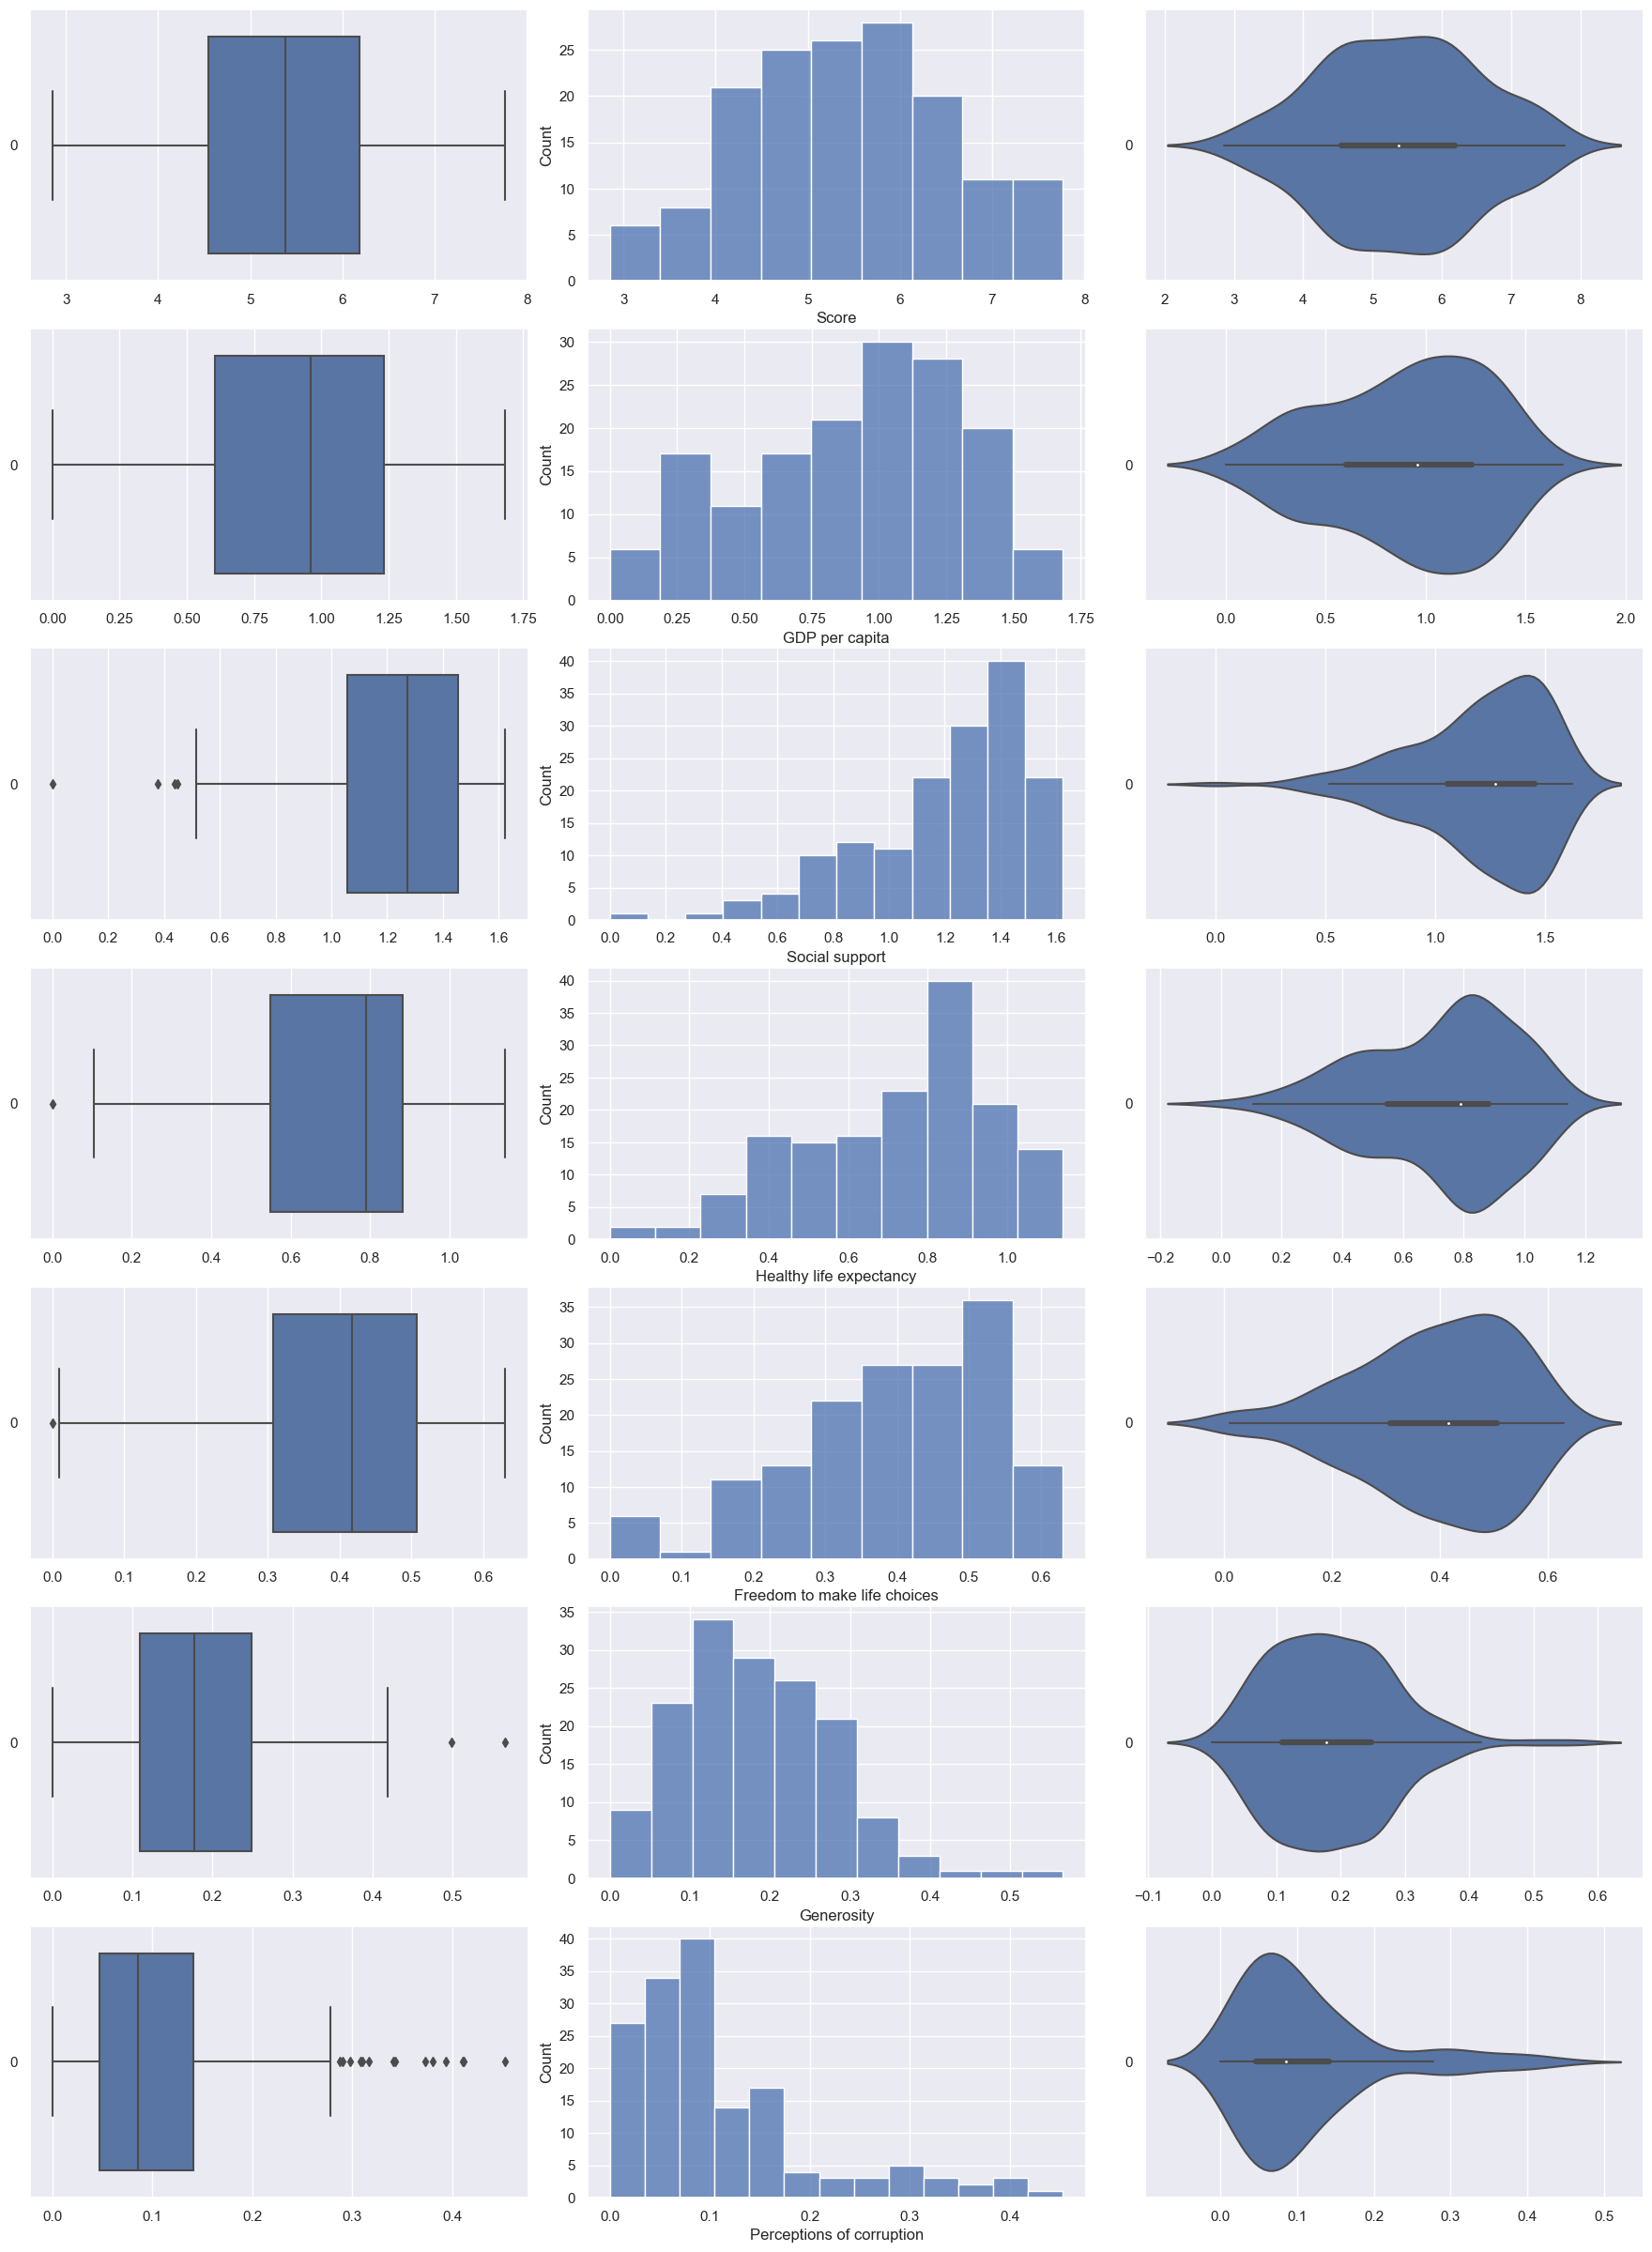

In [43]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 24))
f.tight_layout()

count = 0
for var in extentsDF:
    sb.boxplot(data = extentsDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = extentsDF[var], ax = axes[count,1])
    sb.violinplot(data = extentsDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [44]:
actualDF = pd.DataFrame(worldhappinessreport[["Score","Actual GDP per Capita", "Freedom Score", "Giving Index", "Life Expectancy", "Social Support", "Trust in Govt"]])

actualDF.describe()

,Score,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
count,156.000000,152.000000,149.000000,129.000000,139.000000,40.000000,40.000000
mean,5.407096,15463.533436,7.153557,0.324884,72.782734,90.379034,45.839664
std,1.113120,20899.614883,1.238094,0.100391,7.883196,4.630278,14.586554
min,2.853000,216.972968,3.660000,0.160000,52.800000,77.869643,15.252345
25%,4.544500,1877.695911,6.280000,0.250000,66.800000,87.339351,36.653301
50%,5.379500,5909.604732,7.120000,0.310000,74.900000,91.645122,45.283193
75%,6.184500,19436.396172,8.210000,0.390000,78.500000,94.026779,55.227595
max,7.769000,112621.821300,9.110000,0.580000,84.500000,97.370335,80.661271


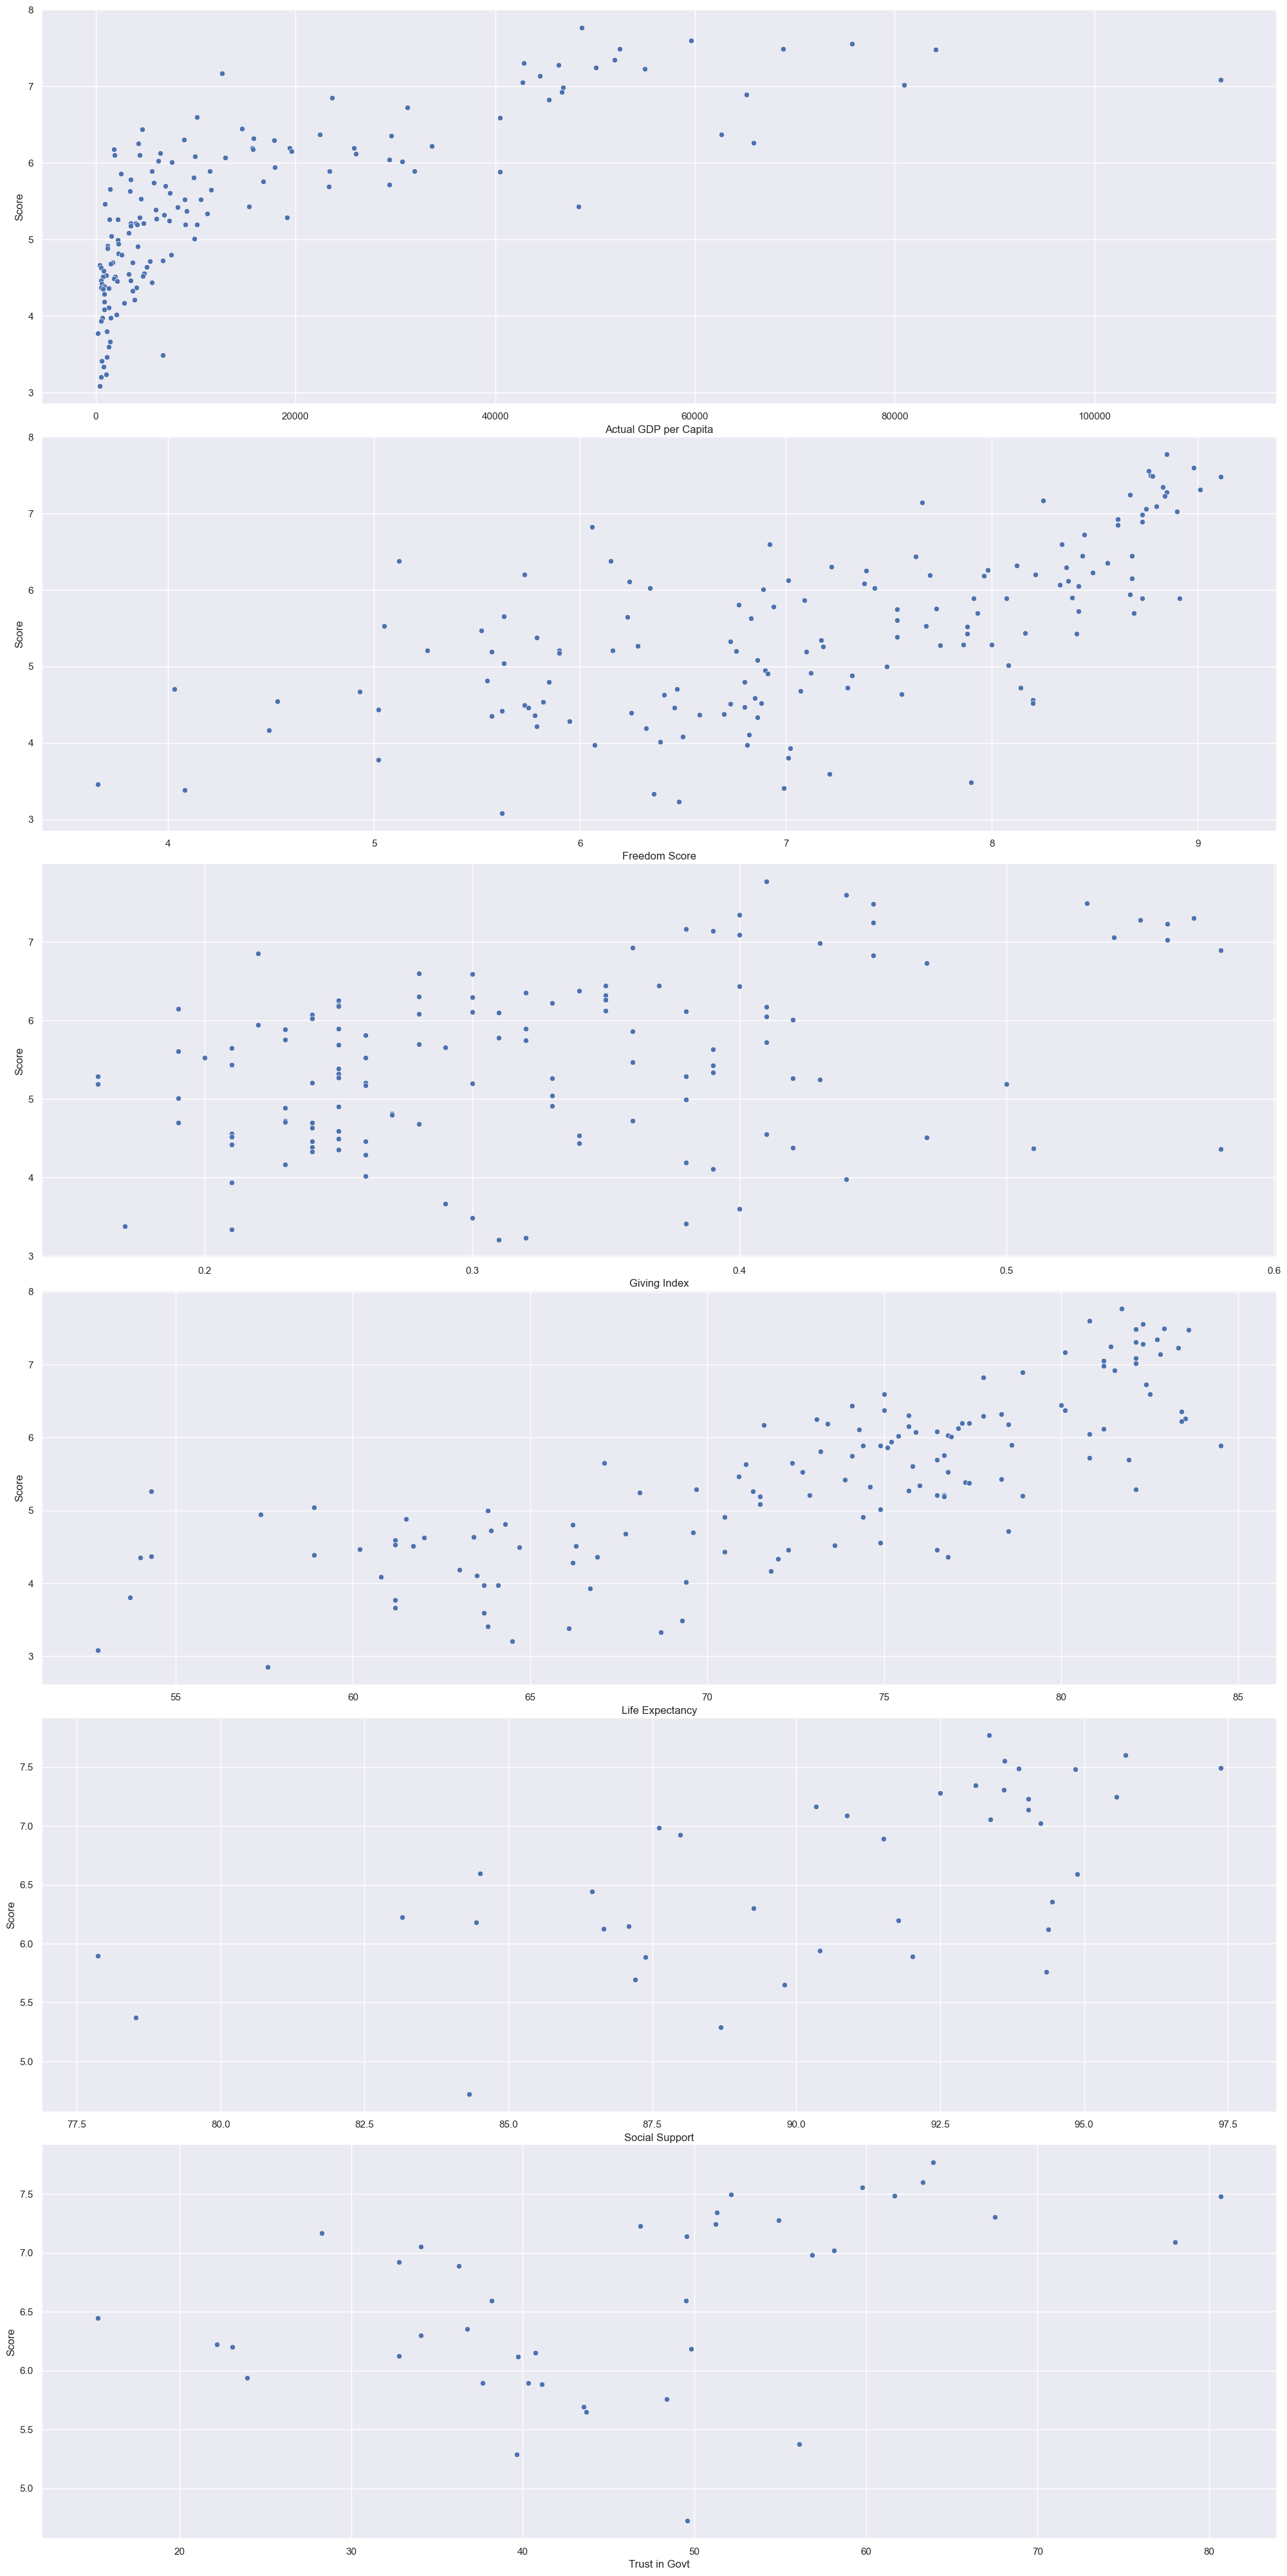

In [45]:
f, axes = plt.subplots(6, 1, figsize=(20, 40))
f.tight_layout()

a=0
for var in actualDF:
    if a==6:
        break
    else:
        sb.scatterplot(data = actualDF, x=actualDF.columns[a+1],y='Score',ax = axes[a])
        a+=1

In [46]:
worldhappinessreport

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.858230,8.85,0.41,81.7,93.351599,63.918815
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.980690,8.98,0.44,80.8,95.719190,63.299903
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.752900,8.76,NaN,82.3,93.622476,59.798701
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.715220,8.77,NaN,82.9,97.370335,52.137706
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.273250,8.78,0.53,82.1,93.864642,61.657224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,806.879981,6.36,0.21,68.7,NaN,NaN
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1052.021729,6.48,0.32,NaN,NaN,NaN
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,500.522664,NaN,0.31,64.5,NaN,NaN
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,426.408763,5.62,NaN,52.8,NaN,NaN


# Using Linear Regression to predict happiness score
We will use the factor that has the highest correlation with the happiness score

To do so, we will first remove the columns that correspond to how much the citizens of each country perceive each factor to contribute to their happiness level 

In [47]:
exclExtents = worldhappinessreport.drop(['Country or region','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'], axis=1)

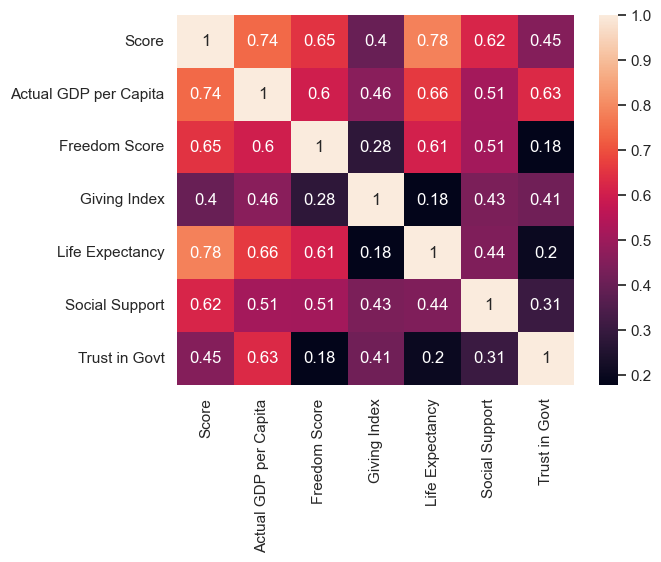

In [48]:
sb.heatmap(exclExtents.corr(),annot=True)
plt.show(10,5)

Life Expectancy and Actual GDP per Capita seem to have the highest correlation with Happiness Scores so we will predict Happiness Scores based on these 2

First, we will use the Linear Regerssion model using Life Expectancy to predict the Happiness Scores

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

happinessscore = pd.DataFrame(exclExtents['Score']) # Response
LE = pd.DataFrame(exclExtents['Life Expectancy']) # Predictor

LinRegDF = pd.concat([LE, happinessscore], axis = 1).reindex(happinessscore.index).dropna()

LinRegDF

,Life Expectancy,Score
0,81.7,7.769
1,80.8,7.600
2,82.3,7.554
3,82.9,7.494
4,82.1,7.488
...,...,...
150,66.1,3.380
151,68.7,3.334
153,64.5,3.203
154,52.8,3.083


In [50]:
happinessscore = pd.DataFrame(LinRegDF['Score']) # Response
LE = pd.DataFrame(LinRegDF['Life Expectancy']) # Predictor

In [51]:
# Random Train-Test split
train_LE, test_LE, train_hapscore, test_hapscore = train_test_split(LE, happinessscore, test_size = 0.25, random_state=20) # Standardise the random seed for Linear Regression and Random Forest

print('Training WHR Shape:', train_LE.shape)
print('Training Happiness Score Shape:', train_hapscore.shape)
print('Testing WHR Shape:', test_LE.shape)
print('Testing Happiness Score Shape:', test_hapscore.shape)

Training WHR Shape: (104, 1)
Training Happiness Score Shape: (104, 1)
Testing WHR Shape: (35, 1)
Testing Happiness Score Shape: (35, 1)


In [52]:
# Train the Linear Regression model
linreg.fit(train_LE, train_hapscore)

LinearRegression()

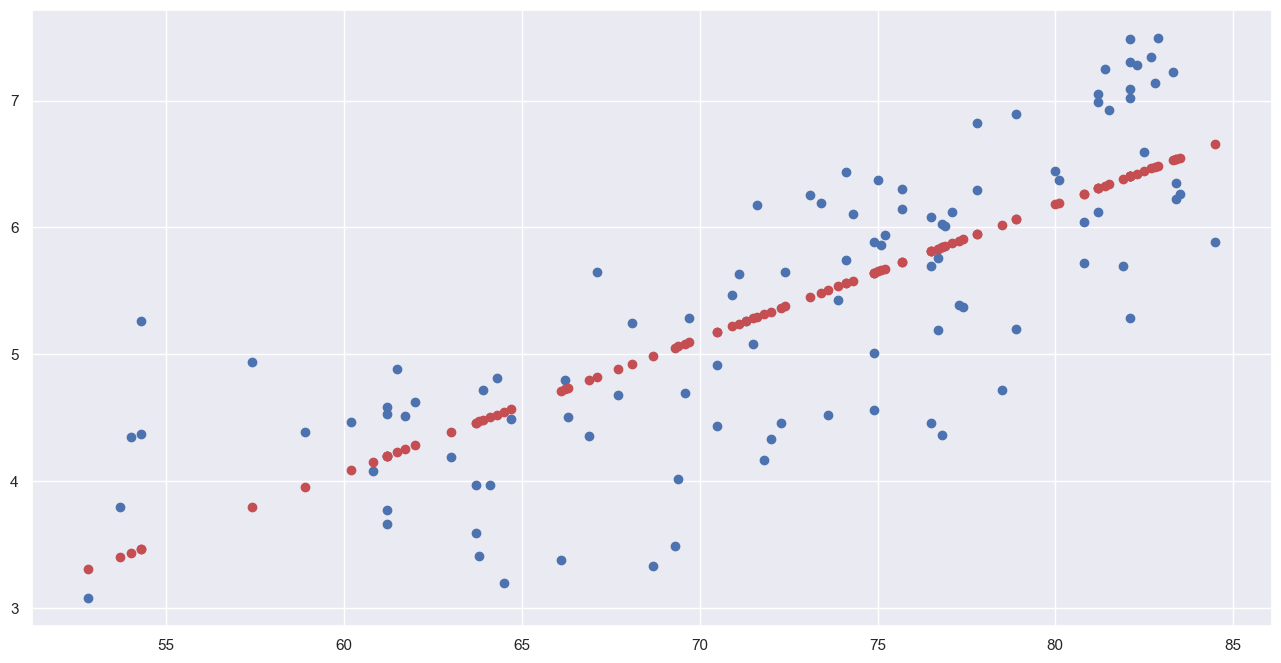

In [53]:
# Predict Happiness Scores corresponding to Life Expectancy Train
hapscore_train_pred = linreg.predict(train_LE)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(train_LE, train_hapscore)
plt.scatter(train_LE, hapscore_train_pred, color = "r")
plt.show()

In [54]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(train_LE, train_hapscore))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(train_hapscore, hapscore_train_pred)
print("Mean Squared Error (MSE) \t:", mse)

import sklearn.metrics as sm

errors = round(sm.mean_absolute_error(train_hapscore, hapscore_train_pred), 2)

print('Mean absolute error =', errors, 'points')

Explained Variance (R^2) 	: 0.5940860145451838
Mean Squared Error (MSE) 	: 0.5133024744202662
Mean absolute error = 0.6 points


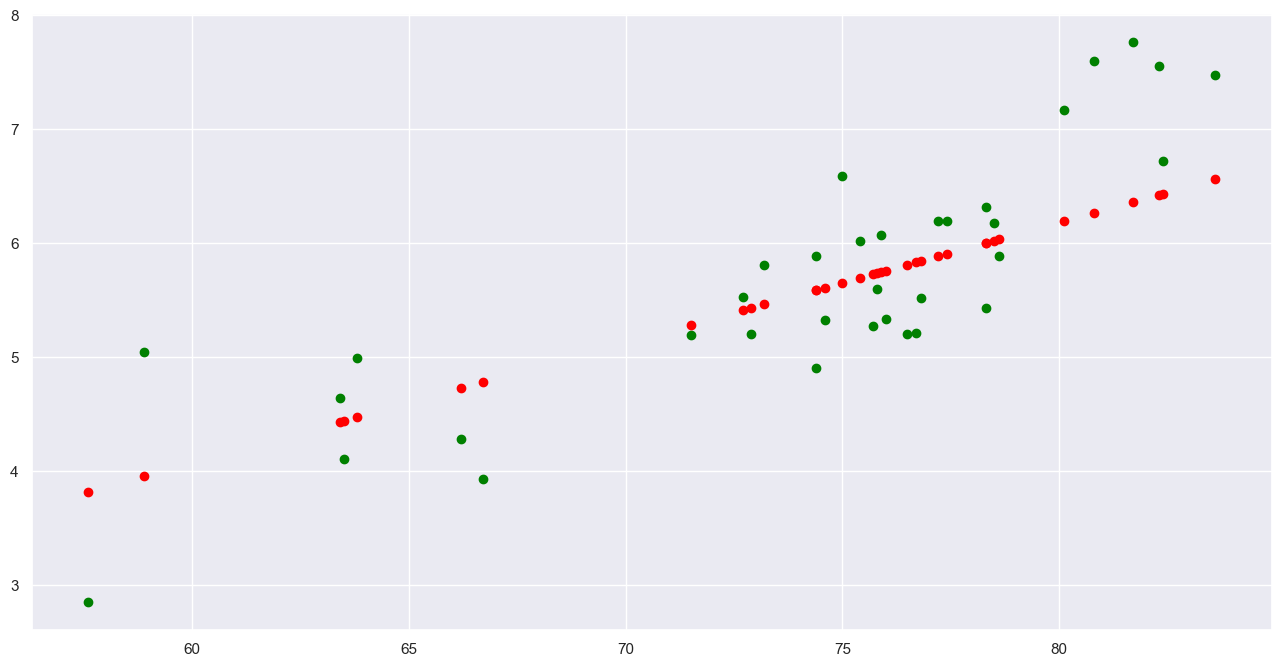

In [55]:
# Predict Happiness Score corresponding to Life Expectancy Test
hapscore_test_pred = linreg.predict(test_LE)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(test_LE, test_hapscore, color = "green")
plt.scatter(test_LE, hapscore_test_pred, color = "red")
plt.show()

In [56]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(test_LE, test_hapscore))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(test_hapscore, hapscore_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

errors = round(sm.mean_absolute_error(test_hapscore, hapscore_test_pred), 2)

print('Mean absolute error =', errors, 'points')

Explained Variance (R^2) 	: 0.6443672762403189
Mean Squared Error (MSE) 	: 0.40605686692307097
Mean absolute error = 0.53 points


# Using Random Forest Regressor to predict Happiness Scores

In [57]:
worldhappinessreport = pd.read_csv('worldhappinessreport.csv')
worldhappinessreport = worldhappinessreport.drop(worldhappinessreport.iloc[:,0:1], axis=1)

happinessscore = np.array(worldhappinessreport['Score'])
countries = np.array(worldhappinessreport['Country or region'])
worldhappinessreport = worldhappinessreport.drop(['Country or region','Score'], axis=1)

In [58]:
worldhappinessreport_list = list(worldhappinessreport.columns)
worldhappinessreport = np.array(worldhappinessreport)

In [59]:
train_whr, test_whr, train_hapscore, test_hapscore = train_test_split(worldhappinessreport, happinessscore, test_size = 0.25, random_state=20) # Standardise the random seed for Linear Regression and Random Forest

print('Training WHR Shape:', train_whr.shape)
print('Training Happiness Score Shape:', train_hapscore.shape)
print('Testing WHR Shape:', test_whr.shape)
print('Testing Happiness Score Shape:', test_hapscore.shape)

Training WHR Shape: (117, 12)
Training Happiness Score Shape: (117,)
Testing WHR Shape: (39, 12)
Testing Happiness Score Shape: (39,)


Impute the missing (NaN) values with the mean values of the respective variables in order to make use of the Random Forest Regressor

In [60]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(train_whr)

train_whr=impute.transform(train_whr)

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(train_whr, train_hapscore)

RandomForestRegressor()

In [62]:
test_whr=impute.transform(test_whr)
predictions = rf.predict(test_whr)

In [63]:
mse = round(sm.mean_squared_error(test_hapscore, predictions),2)
print('Mean Squared Error: ', mse, 'points^2')

mae = round(sm.mean_absolute_error(test_hapscore, predictions), 2)
print('Mean Absolute Error:', mae, 'points')

Mean Squared Error:  0.22 points^2
Mean Absolute Error: 0.35 points


Random Forest Regressor results in both a lower MSE and MAE as compared to Linear Regression (using variable with highest correlation). Hence, we will utilise the Random Forest Regressor instead and improve on it.

# Improving the Random Forest Regressor

We will try removing the columns which have too many NaN values 

In [64]:
worldhappinessreport = pd.read_csv('worldhappinessreport.csv')
worldhappinessreport = worldhappinessreport.drop(worldhappinessreport.iloc[:,0:1], axis=1)
happinessscore = np.array(worldhappinessreport['Score'])
countries = np.array(worldhappinessreport['Country or region'])
worldhappinessreport

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Actual GDP per Capita,Freedom Score,Giving Index,Life Expectancy,Social Support,Trust in Govt
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,48629.858230,8.85,0.41,81.7,93.351599,63.918815
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,59592.980690,8.98,0.44,80.8,95.719190,63.299903
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,75719.752900,8.76,NaN,82.3,93.622476,59.798701
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,68853.715220,8.77,NaN,82.9,97.370335,52.137706
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52476.273250,8.78,0.53,82.1,93.864642,61.657224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,806.879981,6.36,0.21,68.7,NaN,NaN
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1052.021729,6.48,0.32,NaN,NaN,NaN
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,500.522664,NaN,0.31,64.5,NaN,NaN
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,426.408763,5.62,NaN,52.8,NaN,NaN


The columns that have too many NaN values are "Social Support" and "Trust in Govt."

In [65]:
worldhappinessreport = worldhappinessreport.drop(['Country or region','Score','Social Support','Trust in Govt'], axis=1)

In [66]:
worldhappinessreport_list = list(worldhappinessreport.columns)
worldhappinessreport = np.array(worldhappinessreport)

train_whr, test_whr, train_hapscore, test_hapscore = train_test_split(worldhappinessreport, happinessscore, test_size = 0.25, random_state=20)
print('Training WHR Shape:', train_whr.shape)
print('Training Happiness Score Shape:', train_hapscore.shape)
print('Testing WHR Shape:', test_whr.shape)
print('Testing Happiness Score Shape:', test_hapscore.shape)

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(train_whr)

train_whr=impute.transform(train_whr)

Training WHR Shape: (117, 10)
Training Happiness Score Shape: (117,)
Testing WHR Shape: (39, 10)
Testing Happiness Score Shape: (39,)


In [67]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(train_whr, train_hapscore)

test_whr=impute.transform(test_whr)
predictions = rf.predict(test_whr)

mse = round(sm.mean_squared_error(test_hapscore, predictions),2)
print('Mean Squared Error: ', mse, 'points^2')

mae = round(sm.mean_absolute_error(test_hapscore, predictions), 2)
print('Mean Absolute Error:', mae, 'points')

Mean Squared Error:  0.21 points^2
Mean Absolute Error: 0.33 points


# Next, we'll try to increase number of trees/estimators in an attempt to improve accuracy

In [68]:
worldhappinessreport = pd.read_csv('worldhappinessreport.csv')
worldhappinessreport = worldhappinessreport.drop(worldhappinessreport.iloc[:,0:1], axis=1)
happinessscore = np.array(worldhappinessreport['Score'])
countries = np.array(worldhappinessreport['Country or region'])
worldhappinessreport

worldhappinessreport = worldhappinessreport.drop(['Country or region','Score'], axis=1)

worldhappinessreport_list = list(worldhappinessreport.columns)
worldhappinessreport = np.array(worldhappinessreport)

train_whr, test_whr, train_hapscore, test_hapscore = train_test_split(worldhappinessreport, happinessscore, test_size = 0.25, random_state=20)
print('Training WHR Shape:', train_whr.shape)
print('Training Happiness Score Shape:', train_hapscore.shape)
print('Testing WHR Shape:', test_whr.shape)
print('Testing Happiness Score Shape:', test_hapscore.shape)

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(train_whr)

train_whr=impute.transform(train_whr)

rf = RandomForestRegressor(n_estimators = 500) # Estimators set to 500 instead of 100
rf.fit(train_whr, train_hapscore)

test_whr=impute.transform(test_whr)
predictions = rf.predict(test_whr)

mse = round(sm.mean_squared_error(test_hapscore, predictions),2)
print('Mean Squared Error: ', mse, 'points^2')

mae = round(sm.mean_absolute_error(test_hapscore, predictions), 2)
print('Mean Absolute Error:', mae, 'points')

Training WHR Shape: (117, 12)
Training Happiness Score Shape: (117,)
Testing WHR Shape: (39, 12)
Testing Happiness Score Shape: (39,)
Mean Squared Error:  0.22 points^2
Mean Absolute Error: 0.34 points


Increasing number of trees appears to give higher MAE and MSE instead

# Increase number of trees/estimators whilst removing columns with excessive NaN values

In [69]:
worldhappinessreport = pd.read_csv('worldhappinessreport.csv')
worldhappinessreport = worldhappinessreport.drop(worldhappinessreport.iloc[:,0:1], axis=1)
happinessscore = np.array(worldhappinessreport['Score'])
countries = np.array(worldhappinessreport['Country or region'])
worldhappinessreport

worldhappinessreport = worldhappinessreport.drop(['Country or region','Score','Social Support','Trust in Govt'], axis=1) # Remove Social Support and Trust in Govt since too many NaN data points

worldhappinessreport_list = list(worldhappinessreport.columns)
worldhappinessreport = np.array(worldhappinessreport)

train_whr, test_whr, train_hapscore, test_hapscore = train_test_split(worldhappinessreport, happinessscore, test_size = 0.25, random_state=20)
print('Training WHR Shape:', train_whr.shape)
print('Training Happiness Score Shape:', train_hapscore.shape)
print('Testing WHR Shape:', test_whr.shape)
print('Testing Happiness Score Shape:', test_hapscore.shape)

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute = impute.fit(train_whr)

train_whr=impute.transform(train_whr)

rf = RandomForestRegressor(n_estimators = 500) # Estimators set to 500 instead of 100
rf.fit(train_whr, train_hapscore)

test_whr=impute.transform(test_whr)
predictions = rf.predict(test_whr)

mse = round(sm.mean_squared_error(test_hapscore, predictions),2)
print('Mean Squared Error: ', mse, 'points^2')

mae = round(sm.mean_absolute_error(test_hapscore, predictions), 2)
print('Mean Absolute Error:', mae, 'points')

Training WHR Shape: (117, 10)
Training Happiness Score Shape: (117,)
Testing WHR Shape: (39, 10)
Testing Happiness Score Shape: (39,)
Mean Squared Error:  0.22 points^2
Mean Absolute Error: 0.35 points
